# Experiment 4 - ANN Model - Breast Cancer Prediction - Early Stopping & Dropout


## Problem Statement: 
To build an ANN model for classification problem on breast cancer classification to see the effect of: 
- a. Early Stopping 
- b. Dropouts

## GitHub & Google Colab Links:

GitHub Link: https://github.com/piyush-gambhir/ncu-lab-manual-and-end-semester-projects/blob/main/NCU-CSL312%20-%20DL%20-%20Lab%20Manual/Experiment%204/Experiment%204.ipynb 

Google Colab Link:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/piyush-gambhir/ncu-lab-manual-and-end-semester-projects/blob/main/NCU-CSL312%20-%20DL%20-%20Lab%20Manual/Experiment%204/Experiment%204.ipynb)


## Installing Depenedencies

In [1]:
! pip install tabulate numpy pandas matplotlib seaborn

## Code


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

In [3]:
# Loading and Initial Data Check
df = pd.read_csv('cancer_classification.csv')
print(df.head().to_markdown())

|    |   mean radius |   mean texture |   mean perimeter |   mean area |   mean smoothness |   mean compactness |   mean concavity |   mean concave points |   mean symmetry |   mean fractal dimension |   radius error |   texture error |   perimeter error |   area error |   smoothness error |   compactness error |   concavity error |   concave points error |   symmetry error |   fractal dimension error |   worst radius |   worst texture |   worst perimeter |   worst area |   worst smoothness |   worst compactness |   worst concavity |   worst concave points |   worst symmetry |   worst fractal dimension |   benign_0__mal_1 |
|---:|--------------:|---------------:|-----------------:|------------:|------------------:|-------------------:|-----------------:|----------------------:|----------------:|-------------------------:|---------------:|----------------:|------------------:|-------------:|-------------------:|--------------------:|------------------:|-----------------------:|---------

In [4]:
# understanding the data
print("Data Info")
print(df.info())

print("/n")

print("Data Description")
print(df.describe().transpose().to_markdown())

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error

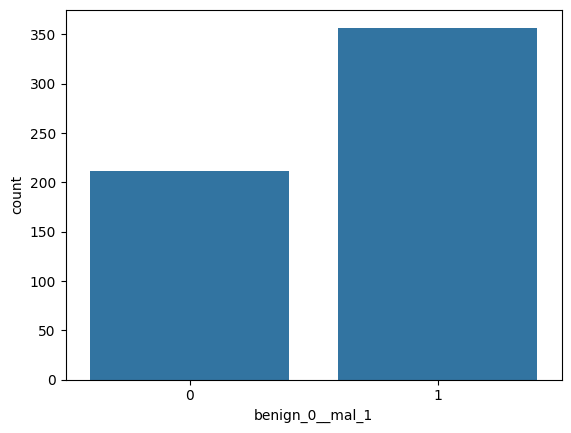

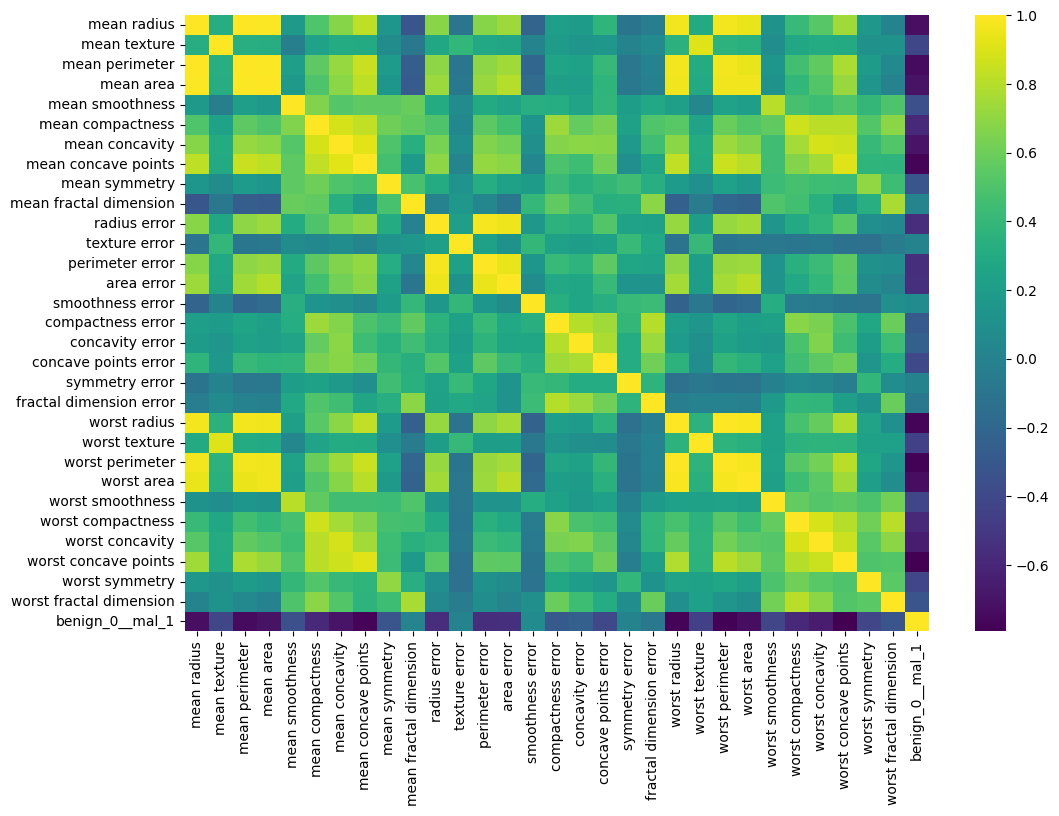

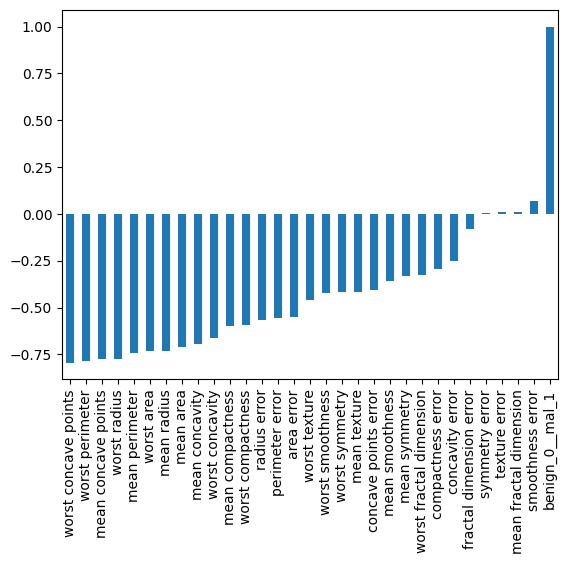

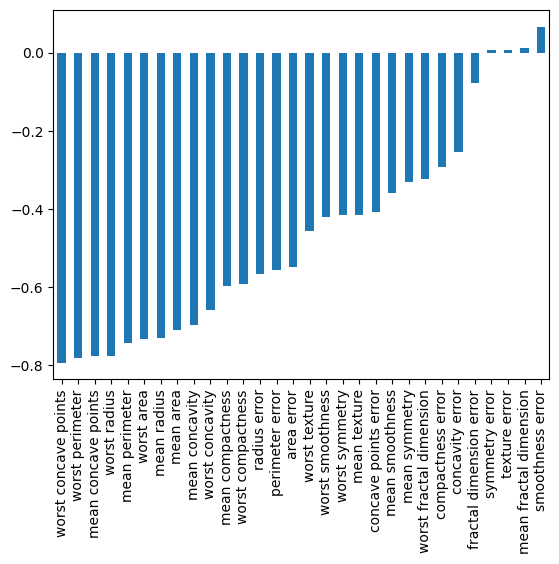

In [5]:

# Exploratory Data Analysis (EDA)
# Distribution of Target Variable
sns.countplot(x='benign_0__mal_1', data=df)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='viridis')
plt.show()

# Correlation with Target Variable
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')
plt.show()
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
plt.show()


In [6]:
# Train Test Split
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=101)


In [7]:
# Scaling Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3566 - loss: 0.7173 - val_accuracy: 0.3916 - val_loss: 0.6914
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4457 - loss: 0.6814 - val_accuracy: 0.6853 - val_loss: 0.6586
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7696 - loss: 0.6496 - val_accuracy: 0.8741 - val_loss: 0.6198
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8958 - loss: 0.6044 - val_accuracy: 0.9091 - val_loss: 0.5714
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8730 - loss: 0.5571 - val_accuracy: 0.9161 - val_loss: 0.5208
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8814 - loss: 0.5056 - val_accuracy: 0.8811 - val_loss: 0.4689
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8947 - loss: 0.4614 - val_accuracy: 0.9161 - val_loss: 0.4229
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8992 - loss: 0.4102 - val_accuracy: 0.9021 - 

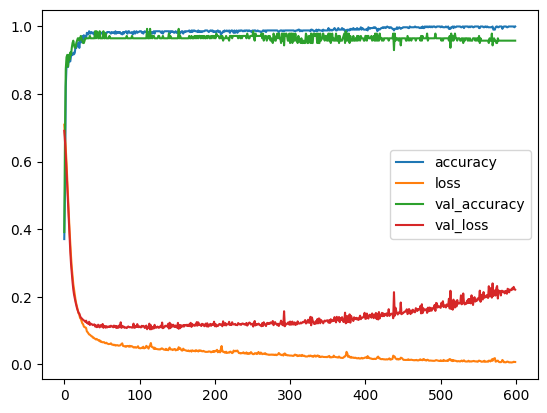

In [8]:


# Creating the Model
model = Sequential([
    Dense(units=30, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# Training the Model - Example One: Overfitting
model.fit(x=X_train, y=y_train, epochs=600,
          validation_data=(X_test, y_test), verbose=1)
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

# Example Two: Early Stopping to prevent overfitting
# Resetting the model
model = Sequential([
    Dense(units=30, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam')


Epoch 1/600


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.6708 - val_loss: 0.6407
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6177 - val_loss: 0.5912
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5778 - val_loss: 0.5454
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5323 - val_loss: 0.4998
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4802 - val_loss: 0.4518
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4237 - val_loss: 0.4060
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4111 - val_loss: 0.3628
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3476 - val_loss: 0.3239
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3148 - val_loss: 0.2922
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3020 - val_loss: 0.2632
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2732 - val_loss: 0.2420
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2440 - v

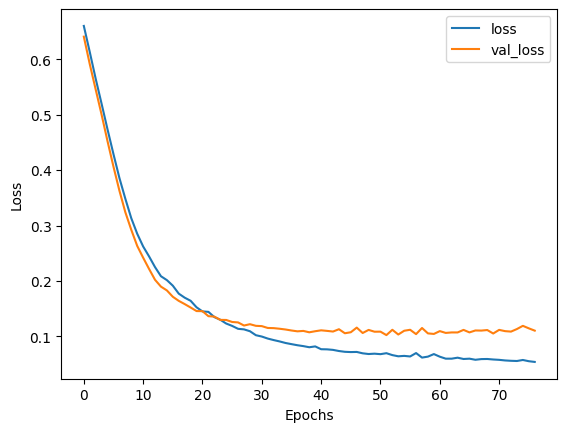

In [9]:

# Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(
    X_test, y_test), callbacks=[early_stop], verbose=1)
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.6901 - val_loss: 0.6594
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6685 - val_loss: 0.6319
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6607 - val_loss: 0.6085
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6163 - val_loss: 0.5764
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5886 - val_loss: 0.5395
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5830 - val_loss: 0.5042
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5545 - val_loss: 0.4770
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5122 - val_loss: 0.4419
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4922 - val_loss: 0.4167
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4831 - val_loss: 0.3899
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4709 - val_loss: 0.3644
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

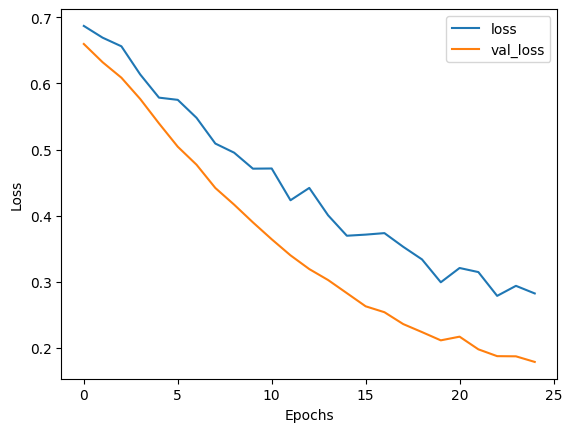

In [10]:
# Adding in DropOut Layers
# Resetting the model
model = Sequential([
    Dense(units=30, activation='relu'),
    Dropout(0.5),
    Dense(units=15, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam')

# Training with Dropout layers
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(
    X_test, y_test), callbacks=[early_stop], verbose=1)
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [11]:
# Model Evaluation using the `predict` method
predictions = model.predict(X_test)

# Convert probabilities to class labels
predictions = (predictions > 0.5).astype(int)

# Now you can use classification_report and confusion_matrix as before
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        55
           1       0.98      0.91      0.94        88

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.93      0.93      0.93       143

[[53  2]
 [ 8 80]]
